### Importing Libs

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras

2023-05-19 14:45:31.274049: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 14:45:31.340979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 14:45:31.343145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 14:45:32.492546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Loading and Exploring Data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (
    test_images,
    test_labels,
) = fashion_mnist.load_data()

In [3]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

### Preprocessing

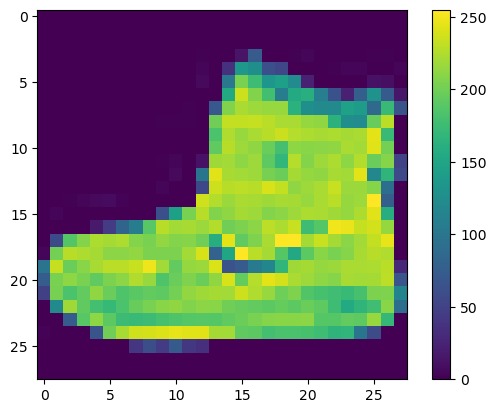

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

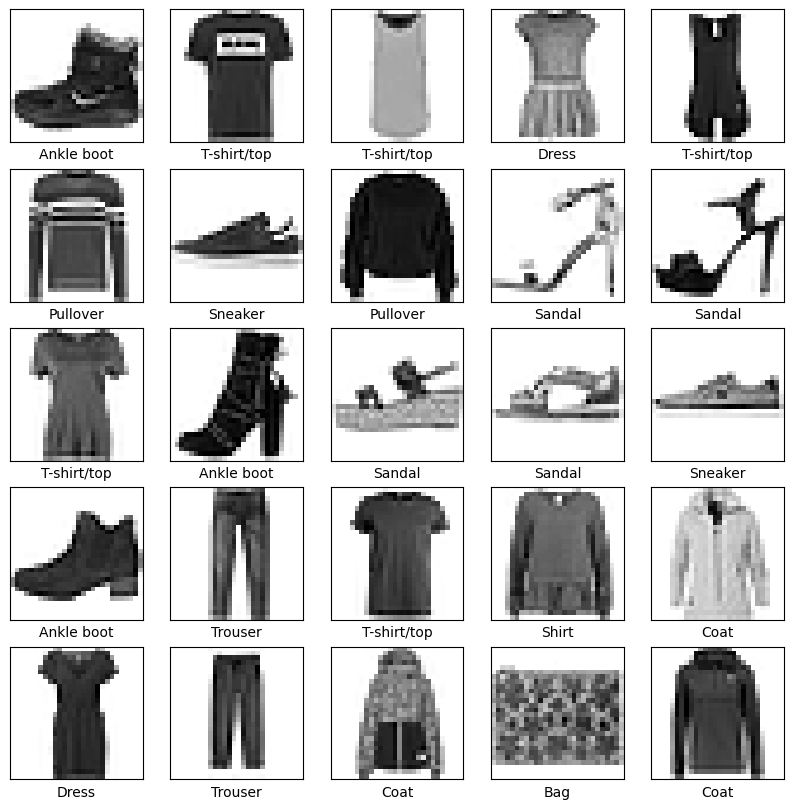

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building model

In [11]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10),
    ]
)


In [12]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4973 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3792 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3397 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3156 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2698 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2572 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2499 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

### Evaluation

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3391 - accuracy: 0.8830 - 527ms/epoch - 2ms/step

Test accuracy: 0.8830000162124634


### Prediction

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [17]:
predictions[0]

array([5.4086915e-08, 4.2683734e-08, 4.1422168e-10, 9.5130793e-13,
       8.2199101e-09, 3.9973442e-04, 3.7458894e-09, 2.6123184e-03,
       5.9401475e-07, 9.9698728e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = (
        predictions_array,
        true_label[i],
        img[i],
    )
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

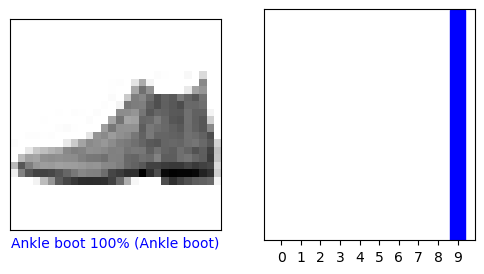

In [20]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

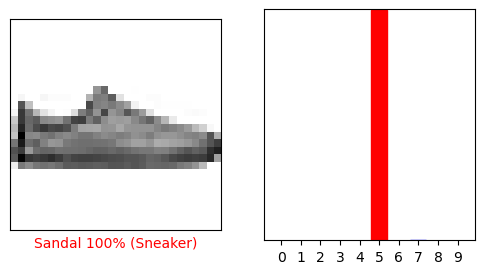

In [21]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

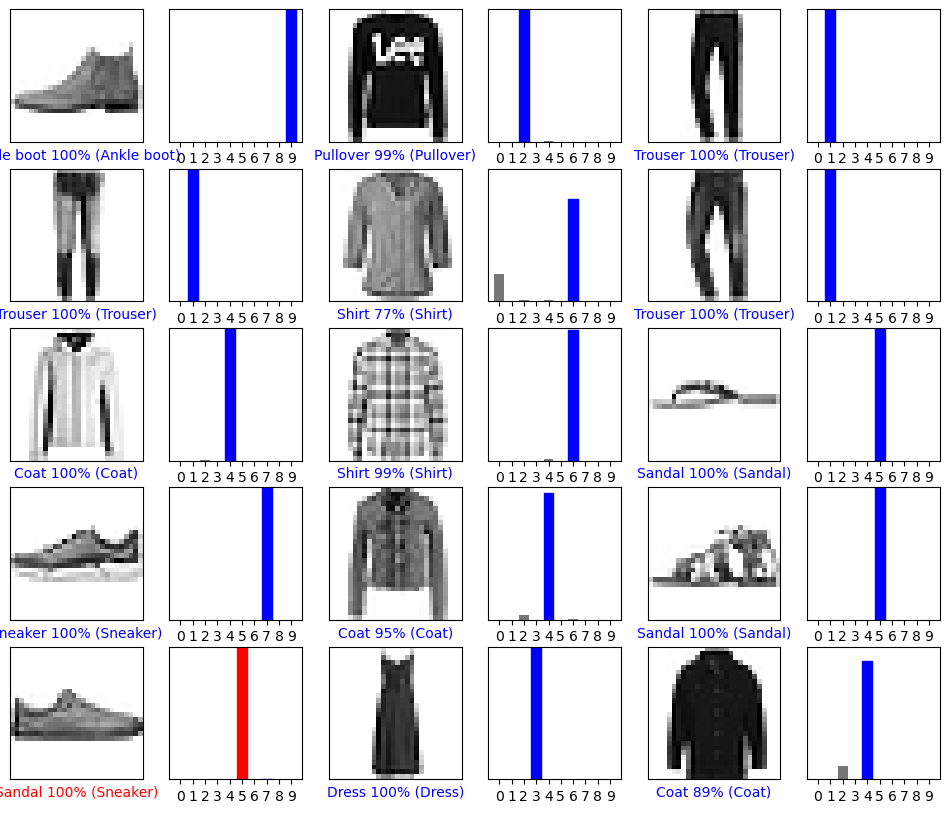

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.show()

### Use the trained model

In [23]:
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[4.4661795e-04 7.1645375e-13 9.9203968e-01 1.2352639e-07 6.0701100e-03
  3.1125056e-13 1.4435048e-03 9.8045631e-15 4.9902478e-09 6.4234785e-12]]


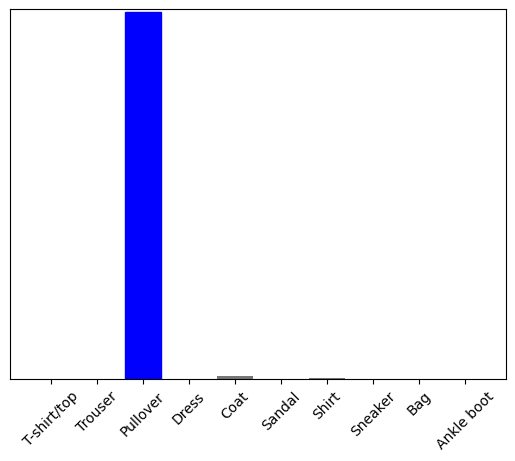

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

2